# Analyze the Diwali-Sales Data

### 1. Importing the libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualizing data
#command used to display figures directly in the notebook
%matplotlib inline
import seaborn as sns

### 2. Read the csv file

In [4]:
df=pd.read_csv('Diwali-Sales-Data.csv',encoding='unicode_escape')

In [5]:
#print the number of columns or rows
df.shape

(11251, 15)

In [14]:
#print the top 10 rows
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


### 3. Data Cleaning

In [6]:
#cheeck the inforamtion of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


#### 3.1 Drop blank columns

In [7]:
#here status and unanamed_1 column contains missing data
#amount also include missing data
#to save the changes we use inplace true

#we drop the blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [21]:
#check
df.info()
#so there is no columns which we delete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


#### 3.2 Check for null values

In [8]:
#we use the isnull function to check null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#amount column contain 12 null values
#so we drop null values with the help of dropna function
df.dropna(inplace=True)

In [26]:
#check again
pd.isnull(df).sum()
#now amount column does not contain any null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### 3.3 Change the datatype of 'Amount' Column 

In [10]:
#from float to int
df['Amount']=df['Amount'].astype('int')

In [11]:
#check the datatype has change or not
df['Amount'].dtypes

dtype('int32')

In [12]:
#describe the columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### 4. Exploratory Data Analysis(EDA)

#### 4.1 Analysis Gender Column

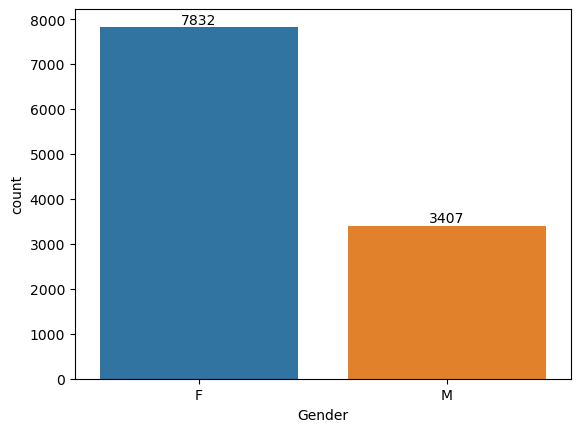

In [13]:
#sns is alias for seaborn library
#gender is in x axis and values in y axis
#The ax.bar_label(bars) method adds text labels on top of the bars in the countplot.
#represents the graphical elements used to display the bars for each category in the plot
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

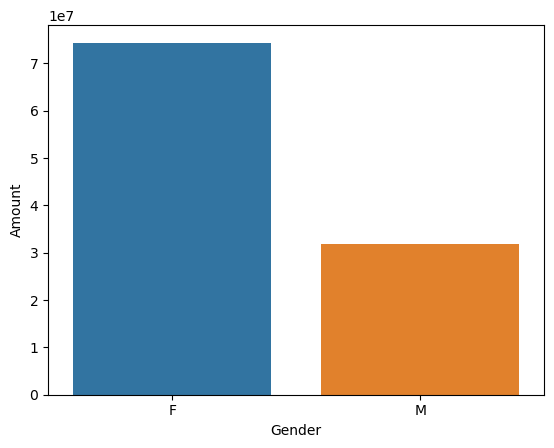

In [14]:
#group a dataframe(df) by the gender column
#calculates the sum of the 'Amount' for each group.
#results sorted in descending order based on the total 'Amount'
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

######  From above graphs we visualize that most of the buyers are Female and also the purchasing power of females are more than the male

#### 4.2 Analysis Age group Column

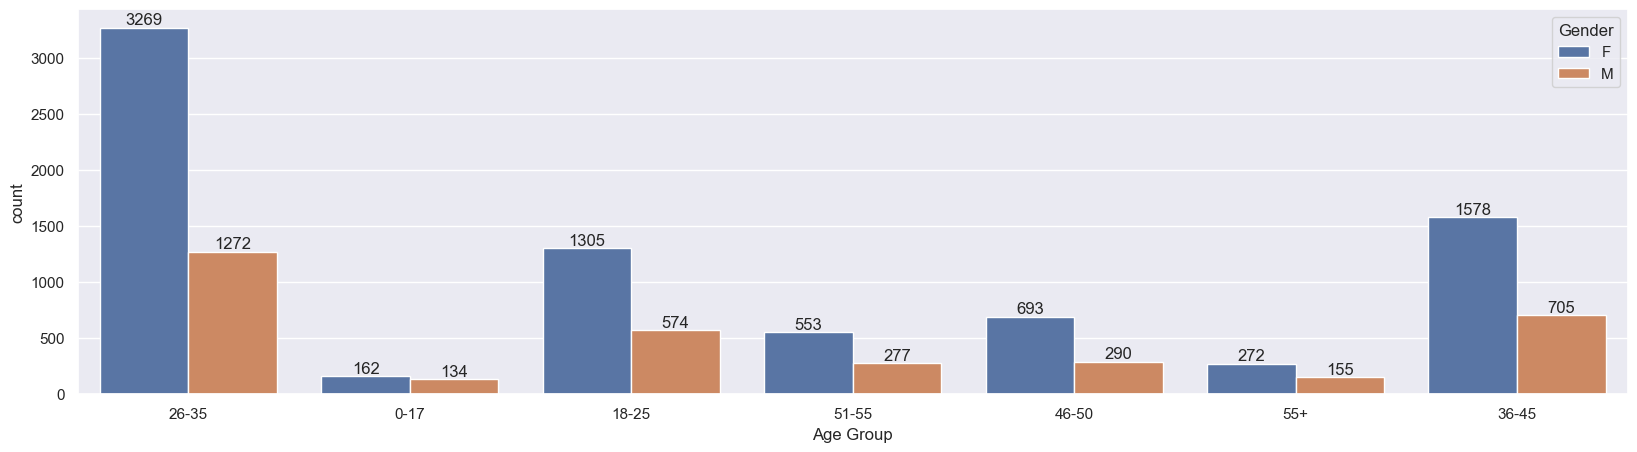

In [21]:
#visulaize the age group column 
#hue used for shows particular categories like male and female in this
ax=sns.countplot(data=df,x='Age Group' ,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

###### From above graphs we can see that most of the buyers are of age group between 26-35 years female

#### 4.3 State group column

<Axes: xlabel='State', ylabel='Orders'>

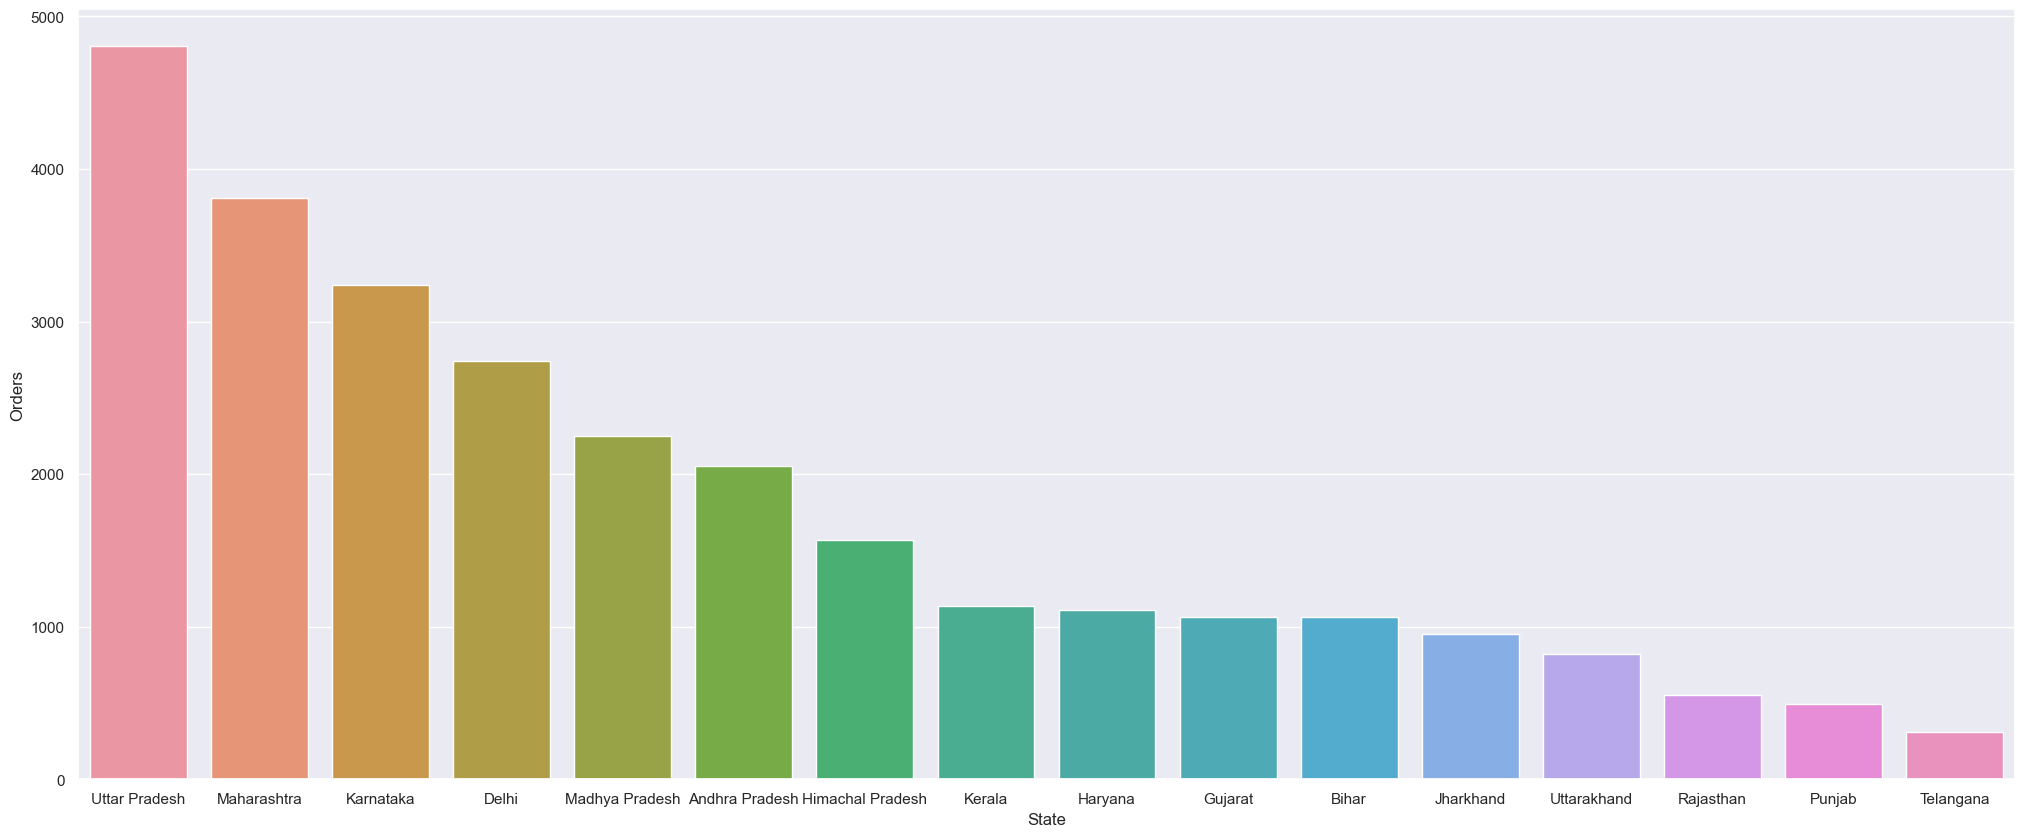

In [17]:
#group by the states column and sum the the total orders
#arrange in descending order
#we use the set function to change the height and width of the figure in inches
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data=sales_state,x='State',y='Orders')

##### From above graph we visualize that number of orders are from UP,Maharashtra,and Karnataka respectively

#### 4.4 Product Category Column

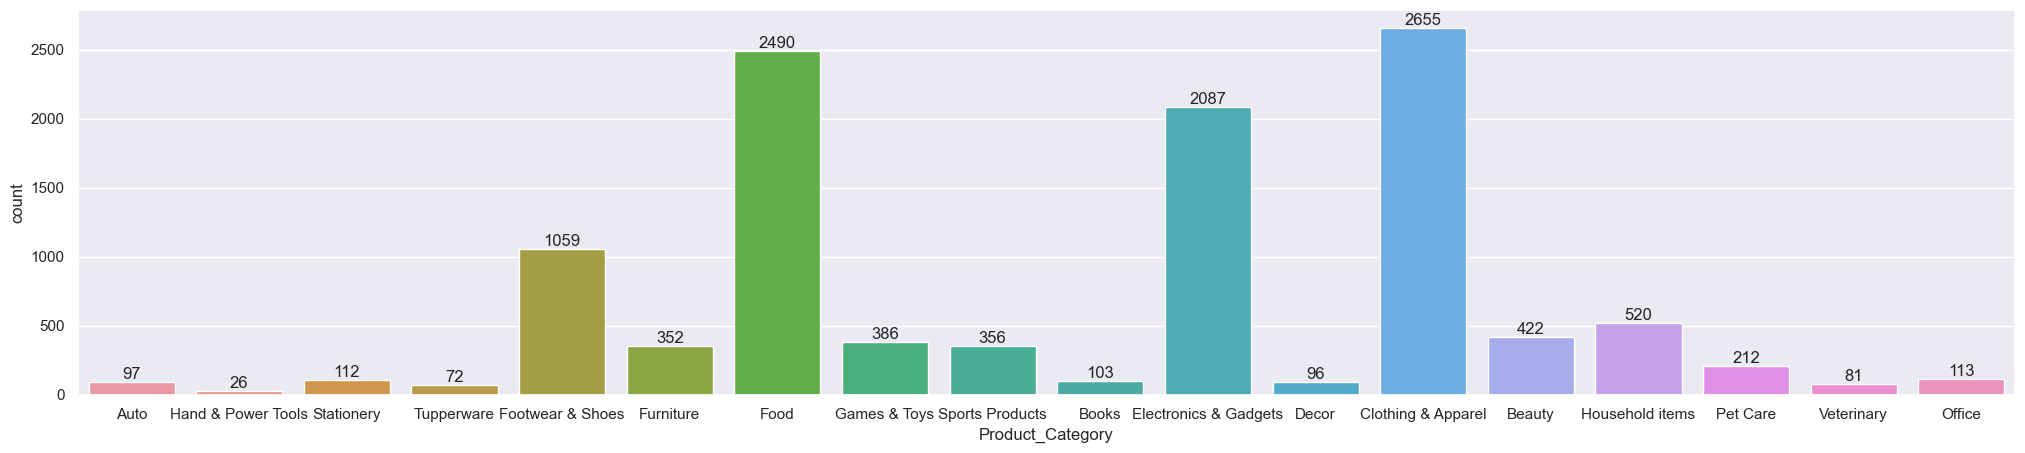

In [18]:
#we count that the which product category sales more
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

##### From above graph we can see that the most of the products are from Clothing,Food and Electronics Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

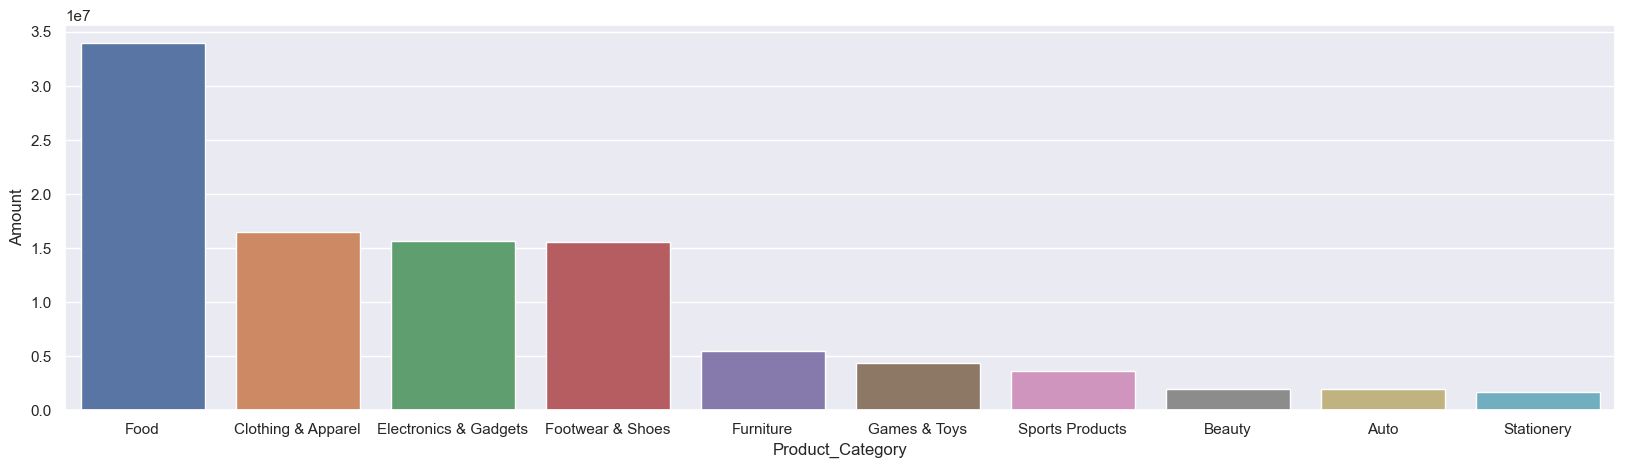

In [19]:
#here we which product category generate amount
sales_prod=df.groupby(['Product_Category'],as_index=False).sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(sales_prod,x='Product_Category',y='Amount')

##### above graph we analyze that the Food category generate more revenue but in previous graph we can see that Clothing category solds more product

### 5. Conclusion

#### Females age group of 26-35 years from UP,Maharashta,karnataka are more likely to buy products from Clothing,Food and Electronics category